## **Spambots Not Found**
Found: Megha, Jiahong, Jeffrey

# **INTRODUCTION**

The objective of our projects is to discover and understand the underlying patterns and trends of spam and non-spam (ham). After figuring out which characteristics and patterns are more common in spam, we can use it to predict whether a message or email is spam or not using an algorithm. 

Spam messages are messages that have the intent of commiting a scam or fraud.
Ham are normal messages that do not do this.

Questions of Interest:
*   What are the most common words, phrases or features that appear in spam?
*   Are we able to categorize the common words and phrases in topic models or are they completely random?
*   What other indicators or patterns can help us identify spam?
*   Is there only two segmentation for spam and non-spam? Can our model be accurate enough to apply or should there be a third segmentation for “maybe spam”
*   Which words appear equally in both ham and spam?
*   Which words appear more in spam but not in ham?
*   Which words appear in ham but not in spam?



## **Preparing the Data**
*   Clean and compile the data
*   Organize into Training, Validation and Test set (60/20/20)



**Importing our Data into a Dataframe**

Our data is retrieved from https://www.kaggle.com/uciml/sms-spam-collection-dataset#spam.csv. 

Our dataset is categorized for us, however we needed to prepare the data a bit as it was not as clean as we hoped it would be. 

We spent a lot of time figuring out how to make our project unique by making it portable. What this means is that we didn't want to have to download the dataset to our local drive and then importing it as csv, we wanted to be able to get it from online, such as a google spreadsheet or from Kaggle directly so anyone who wants to run our Collab would be able to from just a link. After trying several different methods, we finally discovered that instead of 20 lines of code along with importing several different libraries, we could just modify the Google Spreadsheet URL to make it usable for our project. 

The link for the spreadsheet is:https://docs.google.com/spreadsheets/d/181ur8x4Iikbl_FECwDlitx63woQvSPUzHacwnSDfC9I/export?format=csv&gid=605293020 

**Cleaning the Data**

There are a total of 5,574 records and all of them are SMS texts. There are two columns in the dataset: 'v1' stands for the class of each SMS record(spam or ham), while the 'v2' column contains the text contents of the first message. However, because sometimes there would be continuous messages following the first message, the dataset also have unnamed columns that contain the following messages(up to 3 follwing texts max).  We will need to merge all the following messages' content into the first message and drop them for data cleaness.

Another big issue is there are many texts that contain digit numbers and punctuation which are not considered as 'words'. We decided to remove the digits during the text procession because they lack any meaning when present alone. However, we are interested in the potential pattern in the punctuations associated with the spam and will retrieve each record's punctuations as a separate object for analysis.



# **Data Preprocessing:**

One of the biggest regrets during this project was not understanding the benefits of Collab. Running our code in a local machine requires a lot of debugging due to some of the libraries not working even after downloading it on Anaconda Prompt. Google Collab had no issues, and even lets us run HTML display without any extra work. In the long run, we spent about 4 hours debugging why some libaries were not working when running our code locally.

In [0]:
# Importing all the necessary libraries and data collection of spam messages
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip install --upgrade scattertext
import sys
import scattertext as st
import numpy as np
from IPython.display import IFrame
import spacy
import scattertext as st
from pprint import pprint
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Requirement already up-to-date: scattertext in /usr/local/lib/python3.6/dist-packages (0.0.2.56)


**Calling our dataset from the Google Spreadsheet**




In [0]:
#Loading all th data into a url and reading it
url = 'https://docs.google.com/spreadsheets/d/181ur8x4Iikbl_FECwDlitx63woQvSPUzHacwnSDfC9I/export?format=csv&gid=605293020'
df = pd.read_csv(url)
df['Unnamed: 2'].fillna(" ", inplace = True)
df['Unnamed: 3'].fillna(" ", inplace = True)
df['Unnamed: 4'].fillna(" ", inplace = True)
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

The dataset had several columns. The first column was our category label of our text data, ham or spam. After doing a bit of data exploration, we realize that there are multiple columns that combined to form only one message. This is because sometimes one whole message is sent through several text messages. We processed this data by joining those columns together into one column and dropping the no longer needed columns. We also converted all of the text data to lowercase and removed numbers from our messages. We wanted to focus on the words only. 

In [0]:
#Merge the content of the continuous messages' text into the first message's text
df['v2'] = df[df.columns[1:]].apply(
    lambda x: ' '.join(x.astype(str)),
    axis=1)

#dropping all the unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1,inplace=True) 

df['v2'].isnull().sum()
#converting all the messages into lower
df.loc[:,'v2']= df.loc[:,'v2'].str.lower()
df['v2'].head(5)

#remove digits from the messages
import re
for s in range(len(df['v2'])):
  df['v2'][s]=re.sub(r'\d+', '', df['v2'][s])  
  

In [0]:
#display the top 5 processed records
df['v2'].head()

0    go until jurong point, crazy.. available only ...
1                  ok lar... joking wif u oni...      
2    free entry in  a wkly comp to win fa cup final...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: v2, dtype: object

# **SCATTER TEXT EXPLORER:**

**Building a scatter text explorer to see the most infrequent, average and frequently used spam and non-spam words.**

After reading and researching about Topic Models, we read about concepts like Latent Dirichlet Allocation and non-negative matrix factorization. We realized that we may have been too over ambitious with our project because these were very confusing to us. However one thing we did discover was a powerful NLP library called scattertext. There was only one project online that used scattertext, and it was very difficult to implement. This was a powerful library that effectively allowed us to explore our data. Though there are only 12 lines of code, it took several hours to try to implement on a local computer, only to discover that it works perfectly on collab. 


In [0]:
#finding the top spam and non-spam words with their characteristics
#colors are according to the gradient of the words
%matplotlib inline
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(df,
                            category_col = 'v1',
                            text_col = 'v2',
                             nlp = nlp).build()

html = st.produce_scattertext_explorer(corpus,
                                      category = 'spam',
                                      category_name = 'Spam',
                                      not_category_name = 'Ham',
                                      width_in_pixels = 1000)
display(HTML(html))

The scatterplot is so powerful, it even let's you search for words with the search bar at the bottom, and is interactive if you click on some of the data points. 

The scattertext does not take out any stop words, this was intentional, we wanted to truly see the dataset, even with stop words included. For places where we see, "lt;#&gt", we believe that these are sensitive number amounts that was filtered out. Numbers such as account numbers or a specific number for someone's address. We noticed that these were often categorized under Ham. 

From this visual alone, we discovered the answer to many questions that we had, including whether we can create three segments instead of just using the two ham and spam categories.


The most common words to appear in spam were located in the top left cluster of our visual. Words like: claim, mobile, prize, won, free, nokia, stop, cash, urgent, tone and reply. Though we were not able to develop topic models, we can visibly see that these words are related to instances of where the sender is asking for the recipient to claim a prize, or that they create a sense of urgency asking for the recipient to reply immediately. This is understandable because most of the spams try to trick the receivers into some types of lotteries that they believe they have a high chance of winning something big with a simple and costless attempt.

For words that appear more in Ham but not Spam were located in the bottom right cluster of our visual. Words like: my, but, i'm, ok, he, how, come, got, gud, dat, dun, gon. We can see that Ham words were less likely to follow proper grammar, probably because when people text their friends and family, they do not use proper grammar. 

For words that appeared in both Spam and Ham with relatively the spam frequency, we can see the top right cluster of our visual. Words like: now, for, you, in, only, been. These are mostly stop words and we believe it didn't add value to our observations. However, answering one of our questions of whether we believe that we can base words into three categories instead of just Ham and Spam, perhaps the middle section (light blue, yellow, orange) that divides the top left cluster (dark blue) and bottom right cluster (dark red) can be interpreted as maybe spam, and not weighed as heavily during analysis used. 


However, from the scatter text explorer above, we also find something very interesting. For instance, the 'F***' word only appears in ham but not in spams. This phenomenon reminds us that only hams between friends or family members would contain such a straight word, while spams would avoid such rudeness in order to cover their conspiracy in depth. 

Therefore, whenever you receive a text with full of politeness and sweet temptations, rise your alert as it is more likely a spam. 

In [0]:
#stripping punctuations from all spam and ham messages
spam_df = df[df['v1'] == 'spam'] 
ham_df = df[df['v1'] == 'ham']
spam_list = spam_df['v2'].str.split(' ')
ham_list = ham_df['v2'].str.split(' ')

spam_temp = []
ham_temp = []
#strips punctuation
for text in spam_list: 
    text = [x.strip(string.punctuation) for x in text]
    spam_temp.append(text)

spam_str = [" ".join(text) for text in spam_temp]
spam_str = " ".join(spam_str)

for text in ham_list:
    text = [x.strip(string.punctuation) for x in text]
    ham_temp.append(text)
    
ham_str = [" ".join(text) for text in ham_temp]
ham_str = " ".join(ham_str)        

## **WORD CLOUD OF ALL SPAM WORDS:**

In the wordcloud below, we filtered out the stopwords to get a clearer sense of the top words used in spam.

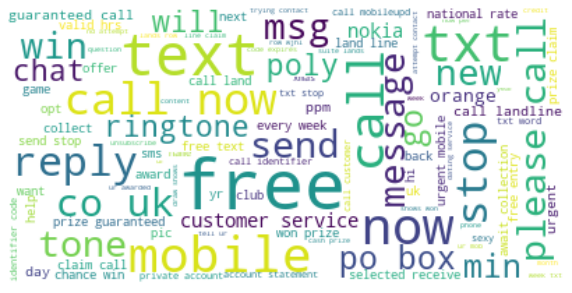

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(["150ppm","150p"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(spam_str)

# Lines 4 to 7
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

As we read through the words in our word cloud, we can almost imagine those spam messages that we've all received at one point in time using a combination of the words above. Words that ask for a response, relating to calling, texting or winning, tend to be SPAM.

# **WORDCLOUD OF ALL HAM (NON-SPAM) WORDS**

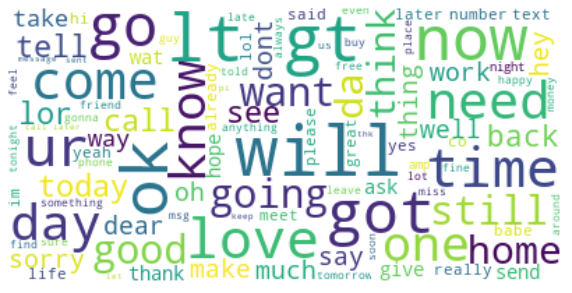

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(["150ppm","150p"])

wordcloud_ham = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(ham_str)

# Lines 4 to 7
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

What is really interesting is the wordcloud for Ham, we see words like "come, know, will, time, love, day, now. 

We immediately think about text that our parents often send to us.
When are you coming home? Come home now.

*   Let me know (what you want, what you need).
*   Will you be back
*   When are you coming home? Come home now.
*   What time will you be back?
*   I love you, I love that

We believe that messages that have words that describe a place, time, or emotions tend to be HAM.

# **Analyzing Patterns in Punctuations**

Below we extracted all the punctuations from the original dataset to see if we are able to identify any patterns or trends with the frequency of punctuations.

In [0]:
#creating a dataframe of all punctuations used in spam and non-spam messages
spam_special = ''
for ind in spam_df.index:
  for letter in spam_df['v2'][ind]:
    if letter in string.punctuation:
      spam_special = spam_special + letter

spam_special = spam_special.replace('.', '')

counted_chars_spam = collections.Counter(spam_special)

chars_count_spam = {}

for letter, count in counted_chars_spam.most_common(30):
  chars_count_spam[letter] = count
    
punct_spam_df = pd.DataFrame(list(chars_count_spam.items()), columns = ['Char', 'Count'])


ham_special = ''
for ind in ham_df.index:
  for letter in ham_df['v2'][ind]:
    if letter in string.punctuation:
      ham_special = ham_special + letter

ham_special = ham_special.replace('.', '')

counted_chars_ham = collections.Counter(ham_special)

chars_count_ham = {}

for letter, count in counted_chars_ham.most_common(30):
  chars_count_ham[letter] = count
    
punct_ham_df = pd.DataFrame(list(chars_count_ham.items()), columns = ['Char', 'Count'])


Interestingy, spam tends to use more ! and / and ham tends to use more ' and ?

In [0]:
punct_spam_df.head()

,Char,Count
0,!,545
1,",",405
2,/,373
3,-,247
4,:,179


In [0]:
punct_ham_df.head()

,Char,Count
0,',1750
1,",",1508
2,?,1375
3,!,852
4,;,766


Below is more data processing to create a barchart showing us the punctuations and frequency per Spam and Ham side by side

In [0]:
#creating a dataframe of all spam and non-spam punctuations into a single dataframe for comparison
punct_df = pd.merge(punct_spam_df, punct_ham_df, on = 'Char')
punct_df = pd.melt(punct_df, id_vars = "Char", var_name = "Spam", value_name = "Count")
punct_df.replace(to_replace = 'Count_x', value = "Spam", inplace = True)
punct_df.replace(to_replace = 'Count_y', value = "Ham", inplace = True)
punct_df.head(10)

,Char,Spam,Count
0,!,Spam,545
1,",",Spam,405
2,/,Spam,373
3,-,Spam,247
4,:,Spam,179
5,&,Spam,178
6,?,Spam,175
7,',Spam,127
8,*,Spam,115
9,+,Spam,99


# **BAR CHART TO SHOW THE TYPE OF PUNCTUATIONS USED IN SPAM AND NON-SPAM MESSAGES:**

Text(0.5, 0.98, 'Frequency of Punctuation Within Spam and Ham')

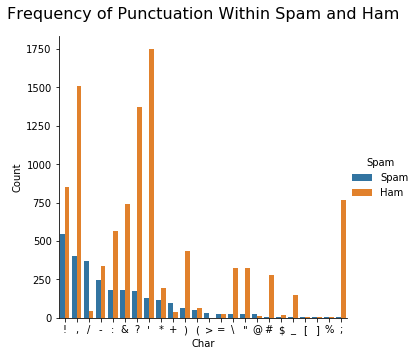

In [0]:
g = sns.factorplot(x="Char",y="Count", kind = 'bar', hue='Spam', data=punct_df)
g.fig.subplots_adjust(top = .9)
g.fig.suptitle("Frequency of Punctuation Within Spam and Ham", fontsize = 16)

There is a clear pattern that we can derive from this visual. Ham messages visibly contain more punctuations overall than Spam.

For punctuations such as ( \  ) , (  "   ), (   #   ) , (  _  ), (  ;   ), these have a high probability of being Ham only, due to little or no Spam using these punctuations. 

Punctuations such as (   /   ) visibly appears most often in Spam only.  

Other punctuations such as (  !  ),  (   ,   ) need to be further analyzed to determine Ham or Spam. 

# **PREDICTION USING NAIVE-BAYES ALGORITHM:**


One approach to predict whether an text is a spam or not is to use the naive-bayes algorithm. 

The naive-bayes algorithm calculate a text's probaility of being a spam using P(class|text) = (P(text|class) * P(class)) / P(text), where  P(class|text) is the spam probability of a given text word. By aggregating the spam probability of each word in a SMS record, the algorithm would be able to classify whether this record is a spam or not.

In [0]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
from nltk.corpus import stopwords
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''

    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word.lower() for word in nopunc.split() if word.lower() not in set(stopwords.words('english'))]
    clean_words = ' '.join(clean_words)
    #3
    return clean_words

In [0]:
#use the function above to convert the text column so that it fits the input format requirement of our incoming naive-bayes training
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['v2'])

In [0]:
#Split data into 80% training & 20% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['v1'], test_size = 0.20, random_state = 0)

In [0]:
messages_bow.shape

(5572, 33)

In [0]:
#import multinomial naive-bayes model to train our classifier on the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#predictions
print(classifier.predict(X_train))
#actual values
print(y_train.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Confusion Matrix of our model on training dataset

In [0]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         ham       0.94      0.97      0.96      3876
        spam       0.75      0.61      0.67       581

    accuracy                           0.92      4457
   macro avg       0.85      0.79      0.82      4457
weighted avg       0.92      0.92      0.92      4457

Confusion Matrix: 
 [[3761  115]
 [ 227  354]]

Accuracy:  0.9232667713708773


Achieved an accuracy of 92% for classifying messages as spam and ham on the training data set

In [0]:
#Print the predictions
print('Predicted value: ',classifier.predict(X_test))
#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Actual value:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Confusion Matrix of our model on the test data set


In [0]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.94      0.97      0.95       949
        spam       0.77      0.62      0.69       166

    accuracy                           0.92      1115
   macro avg       0.86      0.79      0.82      1115
weighted avg       0.91      0.92      0.91      1115

Confusion Matrix: 
 [[919  30]
 [ 63 103]]

Accuracy:  0.9165919282511211


Finally, achieved an accuracy of 92% for predicting messages as spam and ham on the holdout set.

convert the observations and predictions for the test set into arrays for FPR/TPR calculation

In [0]:
#convert the observations and predictions for the test set into arrays for FPR/TPR calculation
import numpy as np
from sklearn import metrics
tested = np.array([ 1 if x == "spam" else 0 for x in y_test  ])
predicted = np.array([ 1 if x == "spam" else 0 for x in pred  ])

Calculate and draw the False Positive Rate(FPR) and True Positive Rate(TPR) of our classifier

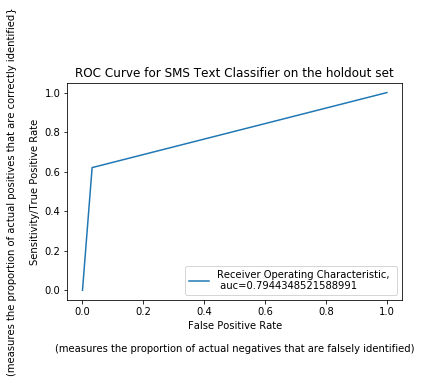

[0.         0.03161222 1.        ] [0.         0.62048193 1.        ]


In [0]:
#Calculate and draw the False Positive Rate(FPR) and True Positive Rate(TPR) of our classifier
fpr, tpr, _ = metrics.roc_curve(tested,  predicted)
auc = metrics.roc_auc_score(tested, predicted)
plt.plot(fpr,tpr,label="Receiver Operating Characteristic, \n auc="+str(auc))
plt.legend(loc=4)

plt.title('ROC Curve for SMS Text Classifier on the holdout set')
plt.xlabel('False Positive Rate\n\n(measures the proportion of actual negatives that are falsely identified)')
plt.ylabel('(measures the proportion of actual positives that are correctly identified}\n\nSensitivity/True Positive Rate')
plt.show()
print(fpr,tpr)

ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The area under the curve (AUC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative'). In this case, we have a very high AUC(0.79), means our classifier naturally works great.

According to the ROC curve, the x-axis stands for the proportion of actual negatives that are falsely identified by the classfier, and the y-axis stands for the proportion of actual positives that are correctly identified by the classifier. Different values of true and false positive rates can be obtained from the same dataset by applying different thresholds, and the elbow on this graph(0.03161222, 0.62048193) stands for the average FPR(1-specificity) and TPR(sensitivity) of our classifier.

We can see, our classifier has a significantly low FPR(3%), means the classifier barely falsely identify a ham as a spam; on the other hand, the classifier has a moderate-high TPR(62%), means that even though our classifier predicts most of the spams correctly, there is also about 38% spams that can not be correctly filtered out and would be classified as hams. 

Overall, our naive-bayes classifier does better job on avoiding classifying hams as spams instead of filtering all spams out(though most of them are correctly filtered). Our classifier may not have the highest accuracy for spam prediction, but it certainly will not make mistakes on classifying hams falsely.

## **Conclusion**

In conclusion, we can definitely identify clusters of words that are commonly found in Spam to effectively determine whether a message is spam or ham. While doing so, we can also analyze the message with regards to the punctuations that the message uses to further identify if it is spam or ham. 

Questions of Interest:
*   What are the most common words, phrases or features that appear in spam?

    **Top Spam Words**: text, free, message, please call, mobile, reply, win, chat, send
*   Are we able to categorize the common words and phrases in topic models or are they completely random?

    **They are not completely random, the common words and phrases for spam and ham can be categorized as per our analysis of the word clouds above.**

*   What other indicators or patterns can help us identify spam?

Other indicators include punctuations. 

    **Punctuations Barely Used in Spam**: ; _  #  "  \

*   Is there only two segmentation for spam and non-spam? Can our model be accurate enough to apply or should there be a third segmentation for “maybe spam”

    **We believe there can be more than two segmentations for spam and non-spam, such as a third one that is neutral, since the words in it are used equally in spam and not spam, as seen in the scattertext. Dark red for ham, dark blue for spam, and the lighter colors in between for neutral.**

*   Which words appear equally in both ham and spam?

    **now, for, you, in , only, been**

*   Which words appear more in spam but not in ham?

    **claim, mobile, prize, won, free, nokia, stop, cash, urgent, tone, reply**

*   Which words appear in ham but not in spam?

    **my, but, i'm, ok, he, how, come, got, gud, dat, dun, gon**

Our results are meaningful because Spam messages are commonly associated with Fraud, and to filter these messages out takes up lots of time in our everyday busy lives. By understanding patterns and trends of Spam messages, we can not only help prevent the common unaware person fall victim to Fraud, but we can also save ourselves lots of times filtering out spam messages. 

Sources:

*   Ms. Dahlin's notes
*   https://github.com/JasonKessler/scattertext
*   StackOverFlow
*   Wikipedia

